In [46]:
# “Listing 5-1 Getting the sunspot data into Python”

import pandas as pd
# data = pd.read_csv('~/Downloads/SN_m_tot_V2_0.csv', sep=';', usecols = [1, 2])
# Download Sunspots.csv from https://www.kaggle.com/datasets/robervalt/sunspots?select=Sunspots.csv

data = pd.read_csv('~/Downloads/Sunspots.csv') 

print(data.head())

   Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0           0  1749-01-31                               96.7
1           1  1749-02-28                              104.3
2           2  1749-03-31                              116.7
3           3  1749-04-30                               92.8
4           4  1749-05-31                              141.7


In [47]:
print(data.columns)

Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')


In [48]:
# “Listing 5-2 Aggregating the sunspot data to yearly data”

data['year'] = data.Date.apply(lambda x: x[:4])
data = data[['Monthly Mean Total Sunspot Number', 'year']].groupby('year').sum()
data.head()


,Monthly Mean Total Sunspot Number
year,
1749,1618.5
1750,1668.0
1751,953.3
1752,956.0
1753,613.5


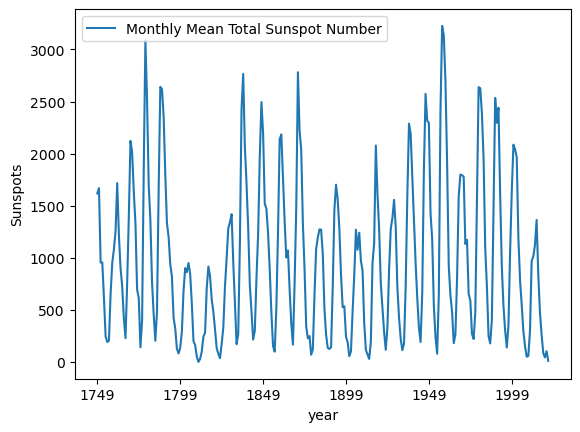

In [49]:
# Listing 5-3 Plotting the yearly sunspot data”

import matplotlib.pyplot as plt

ax = data.plot()
ax.set_ylabel('Sunspots')
plt.show()


In [57]:
# Listing 5-4 Applying the ADF test to the sunspot yearly totals

from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Monthly Mean Total Sunspot Number'])
print(result)
pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')


(-2.653892226122578, 0.08236235258039337, 8, 264, {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}, 3654.5652190879646)
not stationary


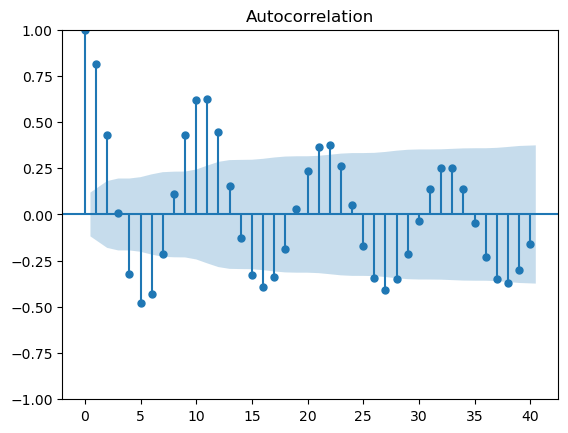

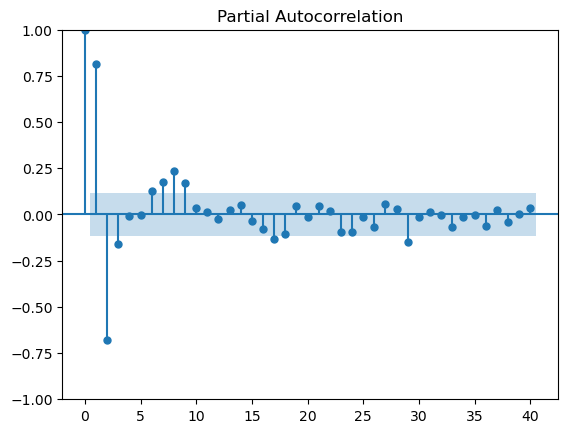

In [59]:
# “Listing 5-5 Creating the ACF and PACF”


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(data['Monthly Mean Total Sunspot Number'], lags=40)
plot_pacf(data['Monthly Mean Total Sunspot Number'], lags=40)
plt.show()


0.7628968971702629


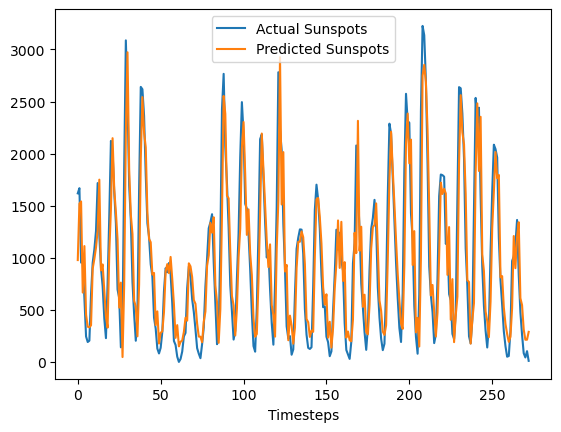

In [60]:
# Listing 5-6Fitting the ARMA(1,1) model

from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
# Forecast the first ARMA(1,1) model
mod = ARIMA(list(data['Monthly Mean Total Sunspot Number']), order=(1,0,1))
res = mod.fit()
pred = res.predict()
print(r2_score(data, pred))
plt.plot(list(data['Monthly Mean Total Sunspot Number']))
plt.plot(pred)
plt.legend(['Actual Sunspots', 'Predicted Sunspots'])
plt.xlabel('Timesteps')
plt.show()


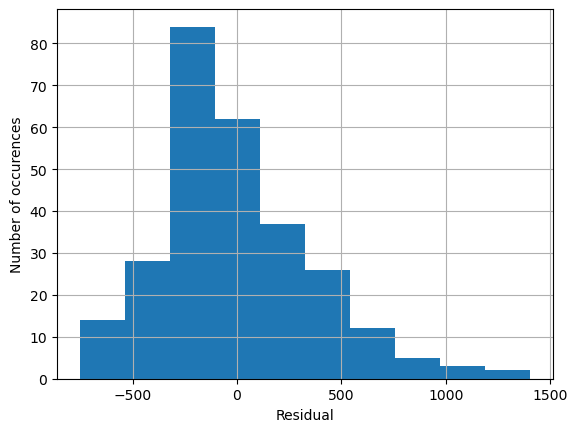

In [61]:
# Listing 5-7Plotting a histogram of the residuals

ax = pd.Series(res.resid).hist()
ax.set_ylabel('Number of occurences')
ax.set_xlabel('Residual')
plt.show()

In [62]:
# Listing 5-8Obtaining the summary table of your model’s fit


res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  273
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2001.158
Date:                Thu, 17 Apr 2025   AIC                           4010.316
Time:                        11:38:54   BIC                           4024.754
Sample:                             0   HQIC                          4016.112
                                - 273                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        977.9319    154.350      6.336      0.000     675.411    1280.453
ar.L1          0.7224      0.051     14.192      0.000       0.623       0.822
ma.L1          0.5246      0.053      9.964      0.000       0.421       0.628
sigma2      1.355e+05   1.08e+04     12.552      0.000    1.14e+05    1.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   8.45   Jarque-Bera (JB):                43.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             0.81
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""